In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1234)

In [321]:
def polar_noise(eps, alpha, N):
    e = alpha*eps
    theta = np.random.uniform(0, 2*np.pi, N)
    z = np.random.uniform(0, 1, N)
    r = np.random.gamma(2., alpha/eps, N)
    return (r, theta)
    
def lap_noise(eps, alpha, N):
    return np.random.laplace(0, alpha/eps, N)

In [322]:
def cart2pol(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return(r, theta)

def pol2cart(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return(x, y)

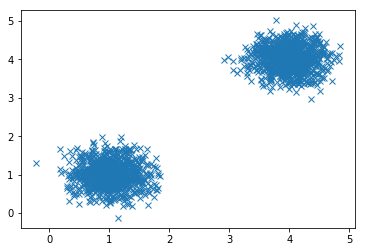

In [323]:
mean, cov = [1, 1], [[0.1, 0], [0, 0.1]]
N = 1000
x1, y1 = np.random.multivariate_normal(mean, cov, N).T
mean, cov = [4, 4], [[0.1, 0], [0, 0.1]]
x2, y2 = np.random.multivariate_normal(mean, cov, N).T
x, y = np.concatenate((x1,x2)), np.concatenate((y1,y2))
plt.plot(x, y, 'x')

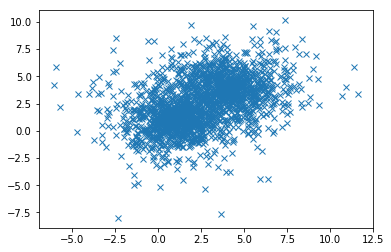

In [326]:
eps=1.0
alpha=1.0
r, t = polar_noise(eps, alpha, N*2)
_x, _y = pol2cart(r, t)
plt.plot(x+_x, y+_y, 'x')

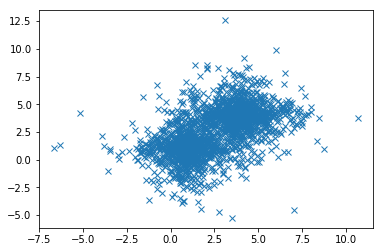

In [327]:
_x, _y = lap_noise(eps, alpha, N*2), lap_noise(eps, alpha, N*2)
plt.plot(x+_x, y+_y, 'x')

In [2]:
# f(x) = (1-p)/(1+p) * p^(|x-μ|)

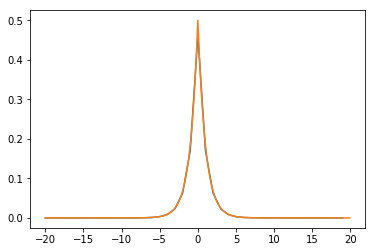

In [50]:
#def discrete_laplace(mu, p):
scale=1
n=10*(2*scale**2)
u=0
x=np.arange(mu-n, mu+n, 1)
p = np.exp(-1/scale)
pr = (1-p)/(1+p) * p**(np.abs(x - mu))
plt.plot(x,pr)

x = np.arange(mu-n, mu+n, 0.1)
pdf = np.exp(-abs(x-mu)/scale)/(2.*scale)
plt.plot(x, pdf)

In [92]:
def discrete_laplace(loc, scale, size=1, prng=np.random):
    # Following https://www.sciencedirect.com/science/article/pii/S0378375804003519 
    # and https://rdrr.io/cran/extraDistr/man/DiscreteLaplace.html
    N = 10*(2*scale**2)     # ten times the variance
    p = np.exp(-1/scale)  # pr. of discrete Laplace, given the scale
    x = np.arange(loc-N, loc+N, 1)
    pr = (1-p)/(1+p) * p**(np.abs(x - loc))
    return prng.choice(x, p=pr, size=size).astype(int)

In [95]:
s = discrete_laplace(loc=0, scale=1, size=(2,10))    
print(s)
#count, bins, ignored = plt.hist(s, 100, density=False)

[[ 0 -3  0  1  0 -2 -1 -3 -4  0]
 [-2  0  0  3  0  3  0  1  2 -3]]


In [6]:
import numpy as np
a = np.array([1,2,3,4,5,6])
a-1

array([0, 1, 2, 3, 4, 5])